# Задача 1. Метод k ближайших соседей

In [178]:
import numpy as np
from sklearn.datasets import make_classification
data = make_classification(n_samples=300, n_features=2, 
                           n_redundant=0, n_classes=4, 
                           n_clusters_per_class=1, random_state=1)

In [207]:
# print(data[0])
# print(data[1])

[[ 0.63797918  0.57295996]
 [ 0.33193762  1.2501394 ]
 [ 0.16007083 -0.91402057]
 [ 0.08277385 -0.43563937]
 [ 0.91050376  1.87487751]
 [-0.81389633 -1.0188809 ]
 [-2.96333132  1.7944496 ]
 [ 0.34433965 -1.06473315]
 [-1.97907771  1.57879263]
 [-0.14381066  0.37873058]
 [-1.6747411   1.54270548]
 [-1.42924111 -0.89259236]
 [ 0.61913712  0.93811641]
 [-2.49749211 -1.69202367]
 [-2.27986293  1.4903401 ]
 [ 0.49584934 -1.4838263 ]
 [-0.32643226 -0.73966509]
 [ 1.65261533  1.71933571]
 [-2.45682408  1.78497595]
 [ 0.76231687 -0.96584968]
 [ 0.70138828  0.98769079]
 [ 1.69971328 -0.02015035]
 [ 1.65383818  0.19329795]
 [-0.07341693  0.58076686]
 [ 1.13304382  0.14524624]
 [ 0.91768703  0.55243001]
 [-0.88762596 -0.81746781]
 [ 1.21158356  0.11685482]
 [ 1.53006814 -1.22234151]
 [ 1.21932429 -0.62224311]
 [-0.10728577 -0.69039303]
 [ 1.57078171  0.38532787]
 [ 1.16548955  0.47926199]
 [-0.29726202 -1.06302718]
 [ 2.07316195 -1.24826377]
 [-0.3576446   0.72771116]
 [-0.85086634 -1.09030108]
 

In [179]:
from sklearn.cross_validation import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(
    data[0], data[1], test_size = 0.33, 
    random_state = 10)


In [180]:
# print(train_data)
# print('----')
# print(train_labels)
# print('----')
# print(test_data)
# print('----')
# print(test_labels)

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics
#Create color maps
colors = ListedColormap(['red', 'blue', 'green', 'grey'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightgreen', 'lightgrey'])

#Plot the decision boundary
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def get_decision_plot(clf, train_data, test_data, train_labels, test_labels):
    clf.fit(X=train_data, y=train_labels)
    xx, yy = get_meshgrid(train_data)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    #Put the result into a color plot on the train data
    Z  = Z.reshape(xx.shape)
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.pcolormesh(xx, yy, Z, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap=colors)
    accuracy = metrics.accuracy_score(y_pred=clf.predict(train_data),
                                      y_true=train_labels)
    plt.title('Train data, accuracy= %.2f' % accuracy)
    
    #plot decision surface on the test data
    plt.subplot(122)
    plt.pcolormesh(xx, yy, Z, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap=colors)
    plt.title('Test data, accuracy= %.2f' % 
              metrics.accuracy_score(y_true=test_labels, y_pred=clf.predict(test_data)))
    return plt

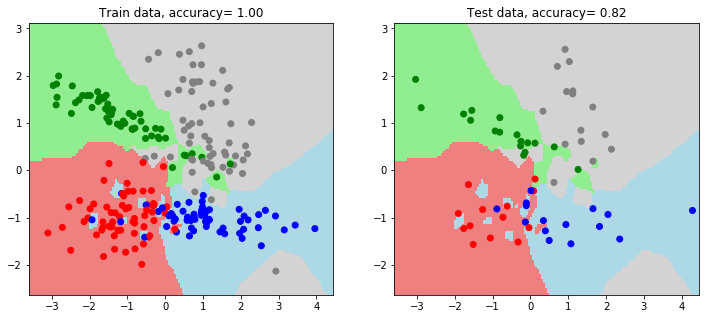

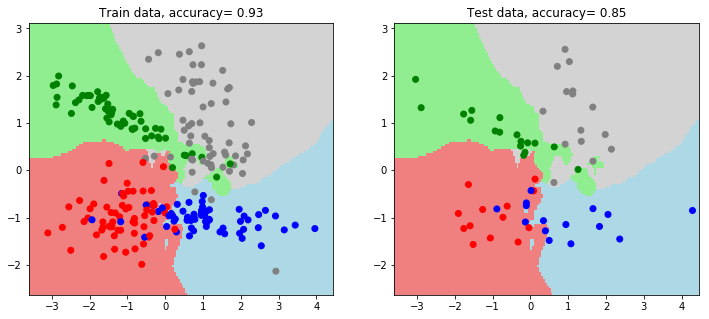

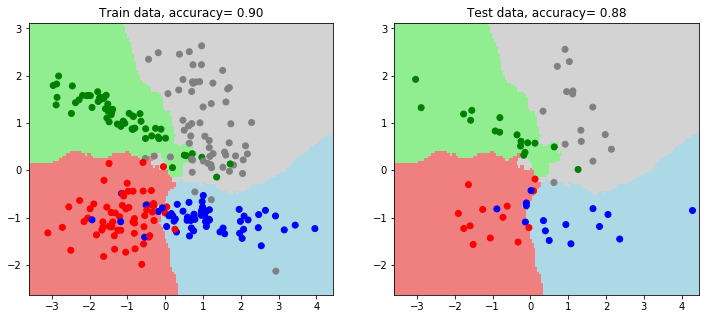

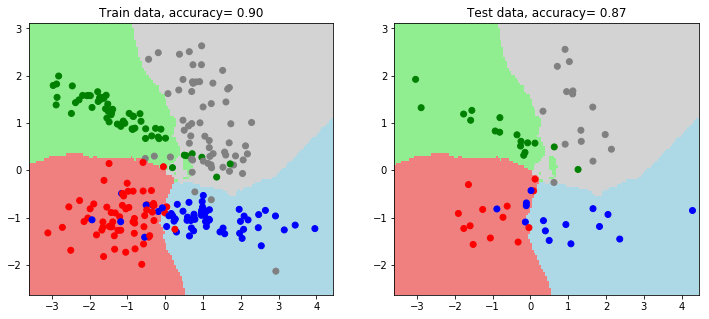

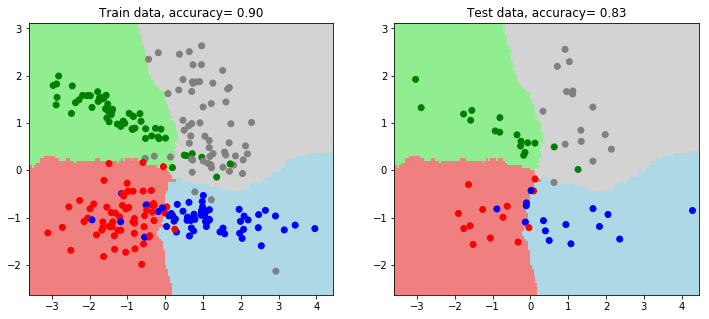

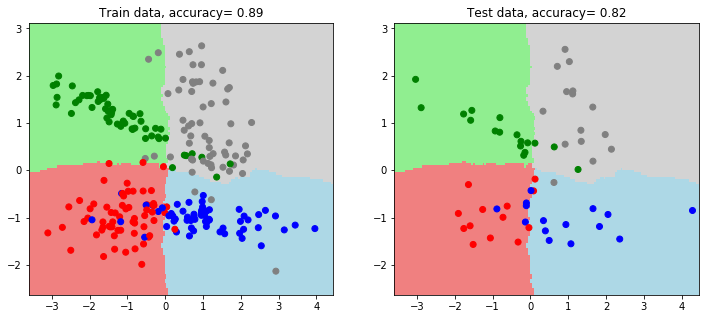

In [231]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [1, 2, 5, 10, 20, 50]

for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors=n)
    get_decision_plot(clf, train_data, test_data, train_labels, test_labels).show()

#### Поиск оптимального k кол-ва соседей с помощью 5-fold cross-validation

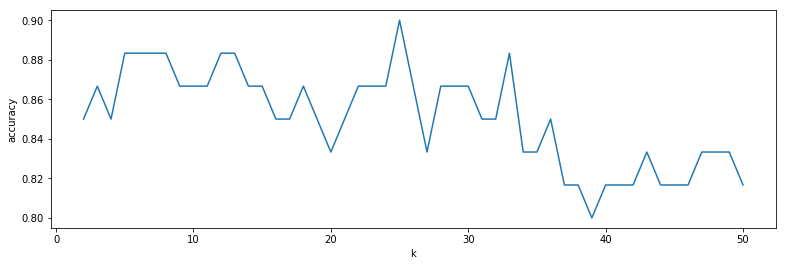

In [229]:
from sklearn.cross_validation import KFold
k_fold = KFold(300, n_folds=5, random_state=1, shuffle=True)
accuracy = []
for k in range(2, 51):
    for train_indices, test_indices in k_fold:
        train_data = data[0][train_indices]
        train_labels = data[1][train_indices]
        new_clf = KNeighborsClassifier(n_neighbors=k)
        new_clf.fit(train_data, train_labels)
        test_data = data[0][test_indices]
        test_labels = data[1][test_indices]
        current_acc = metrics.accuracy_score(test_labels, new_clf.predict(test_data))
    accuracy.append(current_acc )

plt.figure(figsize = (13, 4))
plt.plot(np.array(range(2, 51)), np.array(accuracy))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()     


# Задача 2. Наивный байесовский классификатор

In [15]:
from sklearn.datasets import load_digits, load_breast_cancer

In [18]:
X_digits, y_digits = load_digits(return_X_y=True)
X_breast, y_breast = load_breast_cancer(return_X_y=True)
print(X_digits[:1])
print(X_breast[:1])

[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]
[[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
    1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
    2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
    8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
    5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
    2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
    1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
    4.60100000e-01   1.18900000e-01]]


In [19]:
cancer.target_names

array(['malignant', 'benign'], 
      dtype='|S9')

In [27]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
import numpy as np
models = {"BernoulliNB": BernoulliNB(), 
              "MultinomialNB": MultinomialNB(), 
              "GaussianNB": GaussianNB()
         }
def get_scores(models, X, y):
    scores = {}
    for model_name in models: 
        scores[model_name] = 0.
        for model_name, model in models.items():
                scores[model_name] = np.mean(cvs(model, X, y, cv = 10))
    return scores

In [54]:
print(get_scores(models, X_digits, y_digits))


{'MultinomialNB': 0.88193962163008377, 'BernoulliNB': 0.83185574649501604, 'GaussianNB': 0.81035375835678214}


In [55]:
print(get_scores(models, X_breast, y_breast))

{'MultinomialNB': 0.8929349235156856, 'BernoulliNB': 0.62742740471869329, 'GaussianNB': 0.93867967332123392}


Из результатов видно, что на датасете digits лучше всего проявил себя наивный баейсовский классификатор с мультиноминальным распределением. А на датасете breas - классификатор с гаусовским распределением.

# Задача 3. Метрики в задаче регрессии

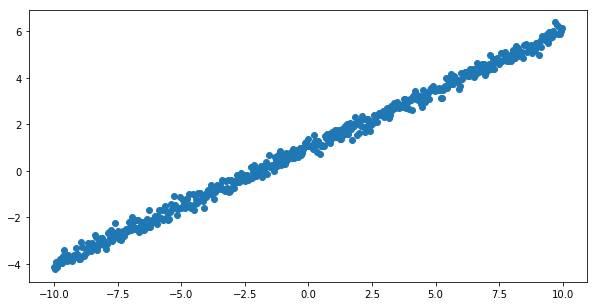

In [54]:
import numpy as np
from matplotlib import pylab as plt
x = np.arange(-10, 10, 0.04)
y = np.array(0.5 * x + 1 + 0.2 * np.random.randn(len(x)))
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o')
plt.show()

In [14]:
from scipy import optimize
def MSE(k):
    sum = 0;
    end = len(x)
    for i in range(0, end - 1):
        sum += (y[i] - k[0] * x[i]-k[1]) ** 2
    return sum / len(x)

print MSE([0.5, 1])

0.0381047518705


In [15]:
coeff = optimize.minimize(MSE, [0, 0])
print(coeff.x)

[ 0.50070628  1.00721935]


In [55]:
from matplotlib import pylab as plt
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o')
y_predict = x * coeff.x[0] + coeff.x[1]
plt.plot(x, y_predict, 'r')
plt.show()

NameError: name 'coeff' is not defined

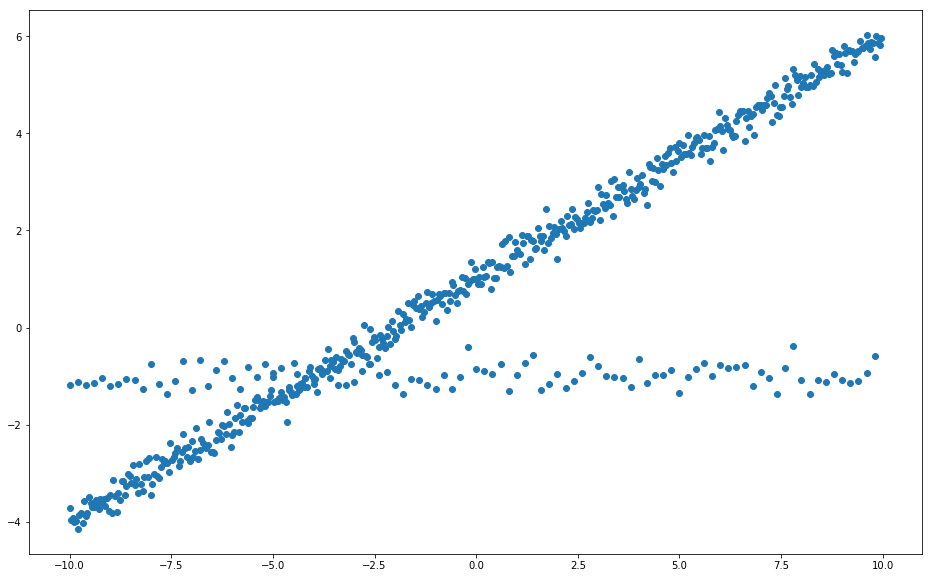

In [17]:
x_noise = np.arange(-10, 10, 0.2)
x = np.hstack((x, x_noise))
y_noise = np.array(0.2 * np.random.randn(len(x_noise)) - 1)
y = np.hstack((y, y_noise))
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o')
plt.show()

In [18]:
kb = optimize.minimize(MSE, [0, 0])

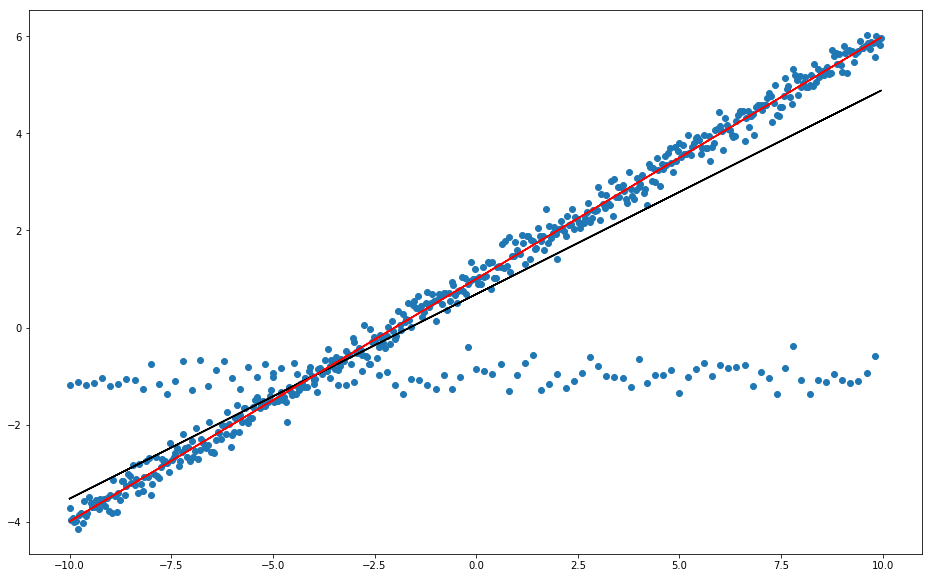

In [19]:
plt.figure(figsize=(16, 10))
plt.plot(x, y, 'o')
y_predict = x * kb.x[0] + kb.x[1]
plt.plot(x, y_predict, 'k')
y_real = 0.5 * x + 1
plt.plot(x, y_real, 'r')
plt.show()

In [20]:
def MAE(k):
    sum = 0;
    end = len(x)
    for i in range(0, end - 1):
        sum += abs(y[i] - k[0] * x[i] - k[1])
    return sum / len(x)

In [21]:
kb = optimize.minimize(MAE, [0, 0])

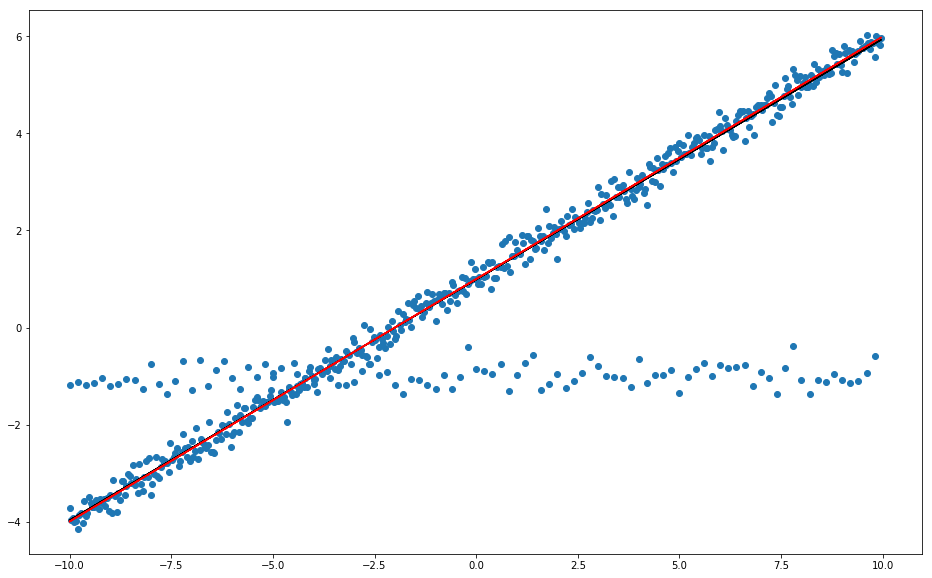

In [22]:
plt.figure(figsize=(16, 10))
plt.plot(x, y, 'o')
y_pred = x * kb.x[0] + kb.x[1]
plt.plot(x, y_pred, 'k')
y_real = 0.5 * x + 1
plt.plot(x, y_real, 'r')
plt.show()

Из графиков видно, что модель, восстановленная с помощью минимизации MAE, более устойчива к выбросам

# Задача 4. Применение решающего дерева

In [71]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
data = np.genfromtxt("/home/fed/Desktop/Python_lessons/german_credit/german.data-numeric")
print data.shape

(1000, 25)


In [72]:
X, y = data[:, :-1], data[:, -1]


In [73]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [74]:
export_graphviz(tree, out_file="dtree.dot")
# !dot -Tpng dtree.dot -o dtree.png

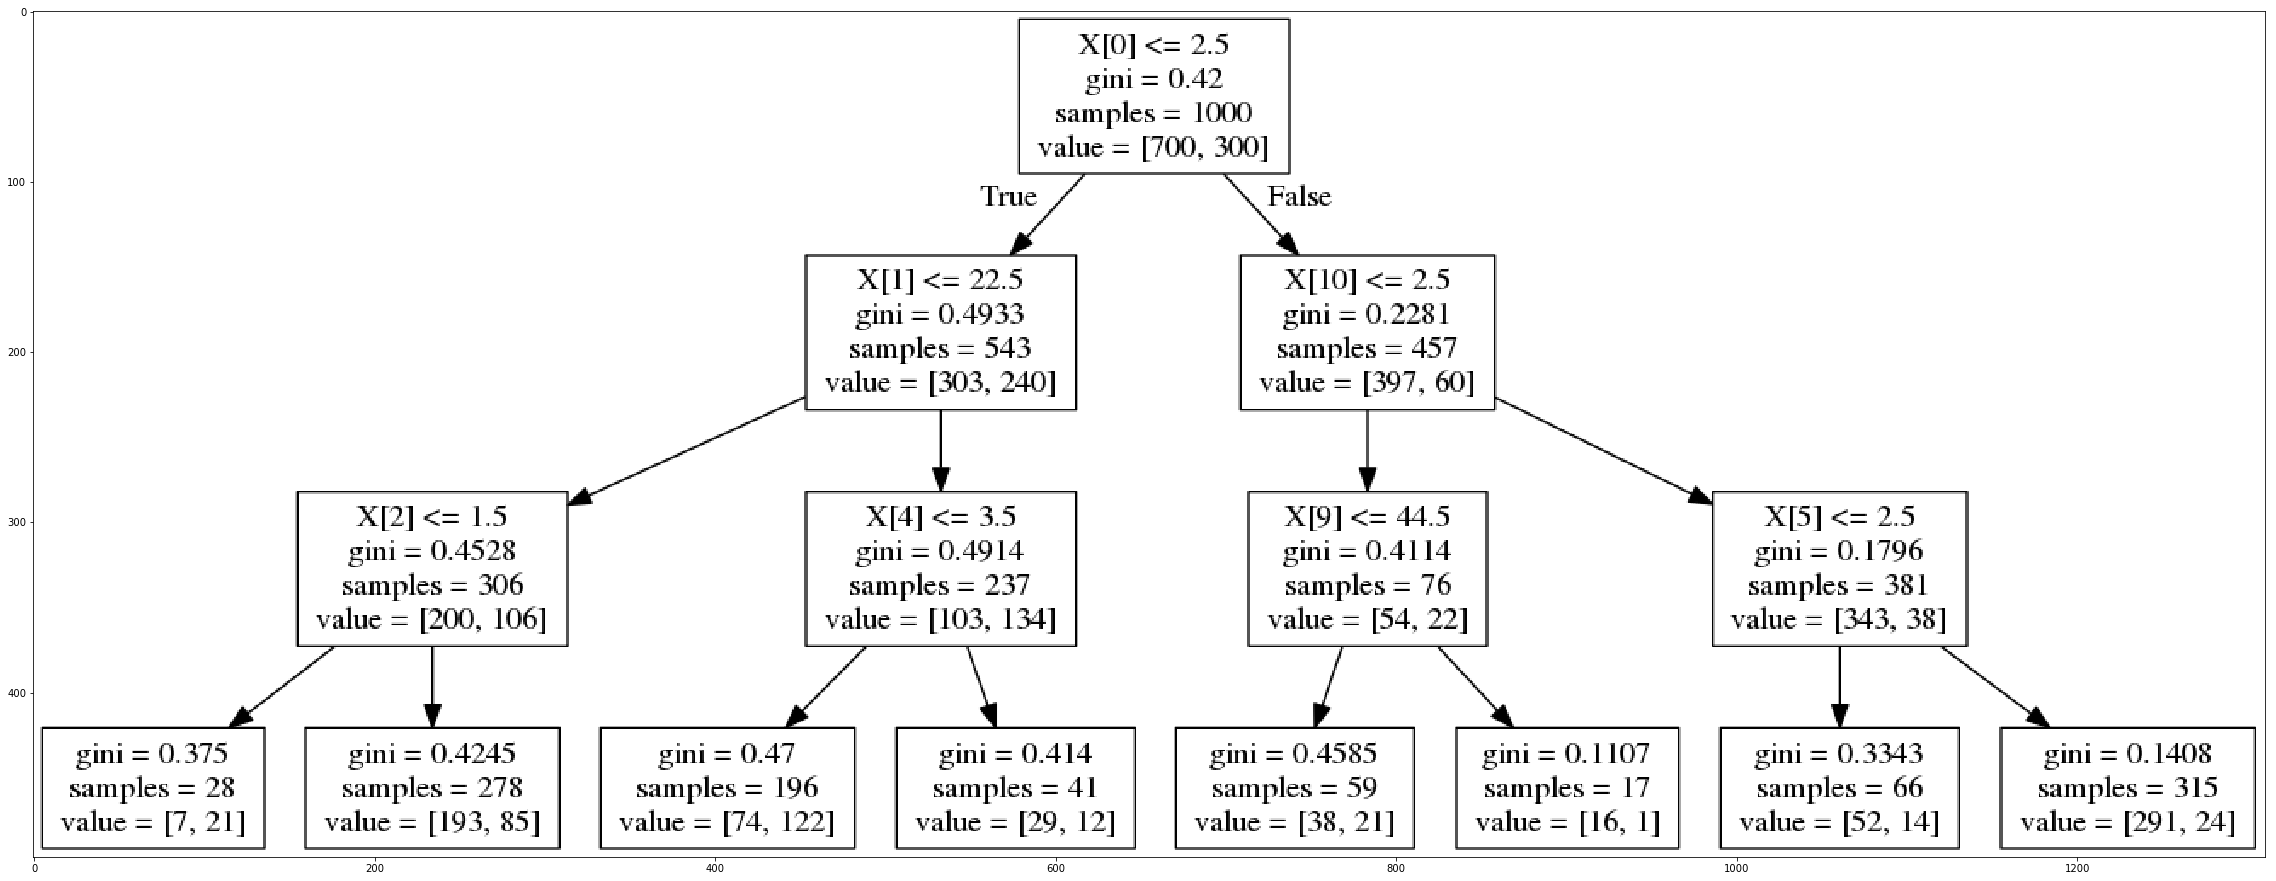

In [75]:
from matplotlib import image
from matplotlib import pyplot as plt
img = image.imread('dtree.png')
plt.figure(figsize=(40, 30))
plt.imshow(img)
plt.show()

Проинтерпретируем полученное дерево.
В первом листе разбиение осуществляется по статусу текущего аккаунта. Если его значение менее 200DM, то идём в левую ветвь, иначе - в правую.
Рассмотрим левую ветвь. В этом листе рассматривается длительность кредита. Если проследить до последнего листа, то видно, что если кредит взят на большой срок и на большую сумму, то это плохой заёмщик.
И, напротив, лучший заёмщик тот, у которого кредит взят на небольшой срок и хорошая кредитная история (либо никогда не брал в кредит, либо всё отдавал в срок).
В правой ветви рассматриваются такие атрибуты, как длительность текущего места жительства, есть ли у клиента иные задолженности или обязательства перед кем-то и размер его сбережений.

#### Посмотрим как меняется качество на кросс-валидации и на обучающей выборке в зависимости от глубины дерева

In [82]:
from sklearn import cross_validation, metrics
from sklearn.model_selection import cross_val_score

scores_cv = []
scores_train = []
depths = range(1, 30)
for depth in depths:
    scores_cv.append(np.mean(cross_val_score(DecisionTreeClassifier(max_depth=depth), 
                                             X, y, cv=10, scoring="f1_weighted")))
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree.fit(X, y)
    scores_train.append(metrics.f1_score(dtree.predict(X), y, average="weighted"))

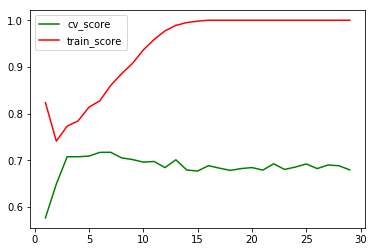

In [83]:
pyplot.plot(depths, scores_cv, color="green", label="cv_score")
pyplot.plot(depths, scores_train, color="red", label="train_score")
pyplot.legend()
pyplot.show()

Из графика видно, что с увеличением глубины дерева, качество на обучающей выборке растет. 
И, напротив, качество на кросс-валидации ухудшается с ростом глубины дерева.

#### Найдём оптимальную глубину дерева

In [84]:
print np.argmax(scores_cv) + 1

7
